<a href="https://colab.research.google.com/github/kojikoji19780303/Cry_baby/blob/master/DAY13_%E3%82%A2%E3%83%A4%E3%83%A1%E3%81%AE%E4%BA%8C%E5%80%A4%E5%88%86%E9%A1%9E_%E8%AA%B2%E9%A1%8C%E6%8F%90%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


【課題1】練習のために特徴量とカテゴリを選択
ポイント：week3のwork1と同様です。pandasデータ操作をおさらいするイメージで着手しよう！
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica
sepal_lengthとpetal_length

In [2]:
# ライブラリをインポート
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
# アイリスデータを抽出
iris_dataset = load_iris()
# .data 部分を抽出し、カラム名も指定する。
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
# .target 部分を抽出し、カラム名も指定する。
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
# .concatを使用してXとyを列方向で結合する。
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# 行からvirgicolorとvirginicaを抜き出す
a = df.query("Species==[1,2]") #query関数の条件式は、文字列で指定する
a


,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# sepal_lengthとpetal_lengthの列を抜き出す
df_selected = a.iloc[:,[0,2,4]]
df_selected


,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [6]:
# 【問題2】データの分析

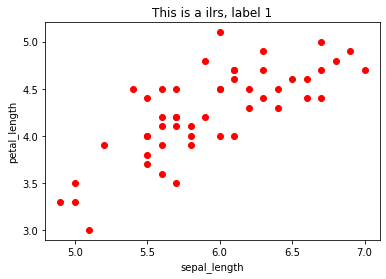

In [7]:
# 特徴量に相関があるかを確認
x_0 = df_selected[df_selected.Species==1].iloc[:, 0]# sepal lengthでラベル1
y_0 = df_selected[df_selected.Species==1].iloc[:, 1]# petal_lengthでラベル1

plt.title("This is a ilrs, label 1")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(x_0, y_0, c='red')

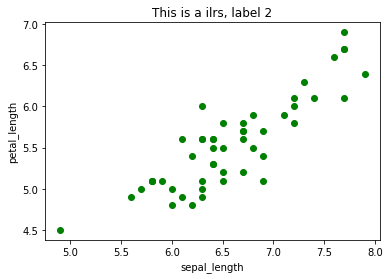

In [8]:
# 特徴量に相関があるかを確認
x_1 = df_selected[df_selected.Species==2].iloc[:, 0]# sepal lengthでラベル2
y_1 = df_selected[df_selected.Species==2].iloc[:, 1]# petal_lengthでラベル2

plt.title("This is a ilrs, label 2")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(x_1, y_1, c='green')

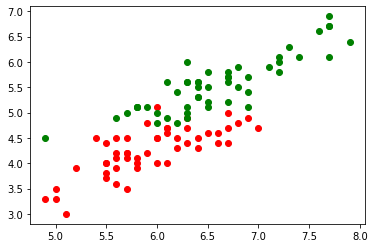

In [9]:
# virgicolorとvirginicaには特徴がある（外れ値もあるが）
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_1, c='green')

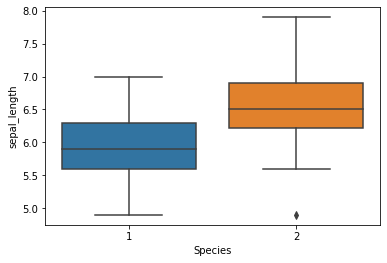

In [10]:
# 箱ひげ図でも確認
sns.boxplot(x="Species", y="sepal_length", data=df_selected)

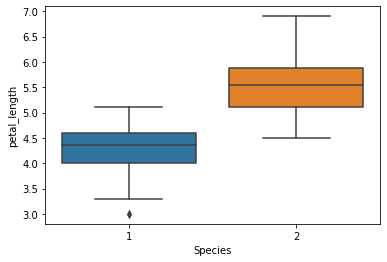

In [11]:
# 箱ひげ図でも確認
sns.boxplot(x="Species", y="petal_length", data=df_selected)

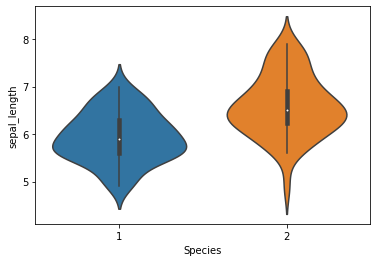

In [12]:
# バイオリン図でも確認
sns.violinplot(x="Species", y="sepal_length", data=df_selected)

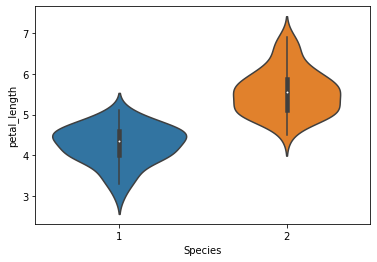

In [13]:
sns.violinplot(x="Species", y="petal_length", data=df_selected)

【問題3】前処理・訓練用データと検証用データの分割
ポイント：学習用データ（train）と検証用データ（test,val）に分けよう！
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

In [14]:
df_selected.head(2)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1


In [15]:
# 訓練用データと検証用データに分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.iloc[:,2], test_size=0.25, random_state=42)

In [16]:
X_train.shape

(75, 2)

In [17]:
X_test.shape

(25, 2)

In [18]:
y_train.shape

(75,)

【問題4】前処理・標準化

In [19]:
y_test.shape

(25,)

In [30]:
 # インポート
from sklearn.preprocessing import StandardScaler
a = StandardScaler()

In [31]:
# 標準化をする（訓練用データで.fitを行う）
# 標準化（Standardization）とは、「平均を0に、標準偏差を1にするスケーリング」です。

a.fit(X_train) #各列の平均値や標準偏差を調べて、aに格納している

StandardScaler()

In [32]:
# 標準化をする（訓練用、検証用双方で.transformを行う）
X_train_transformed = a.transform(X_train)
X_test_transformed = a.transform(X_test)

In [23]:
X_train_transformed

array([[ 0.62124015, -0.65893772],
       [-1.15373171, -0.65893772],
       [ 0.02958286,  0.05557306],
       [-1.59747467, -1.25436337],
       [ 2.10038336,  2.08002027],
       [-0.56207442, -0.89710798],
       [-0.11833146, -0.77802285],
       [ 2.10038336,  1.36550949],
       [-0.4141601 , -0.53985259],
       [ 0.76915447,  1.12733923],
       [-0.85790306, -0.53985259],
       [ 0.32541151,  0.65099871],
       [ 0.17749719,  0.41282845],
       [-0.4141601 , -0.53985259],
       [-1.00581738, -0.53985259],
       [-0.85790306, -1.01619311],
       [-1.30164603, -0.53985259],
       [-2.04121763, -1.96887414],
       [ 0.62124015,  0.29374332],
       [ 0.62124015,  0.05557306],
       [-1.00581738, -1.25436337],
       [ 2.396212  ,  1.72276488],
       [ 0.47332583, -0.65893772],
       [ 0.76915447,  0.65099871],
       [-0.26624578, -0.30168233],
       [ 0.17749719, -0.77802285],
       [-1.15373171, -1.13527824],
       [-0.70998874, -1.01619311],
       [-1.00581738,

【問題5】学習と推定

In [34]:
# sklearnから最近傍法をするモデルをインポートする
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# モデルに引数を渡してインスタン化する
model_1 = KNeighborsClassifier(n_neighbors=1)
model_3 = KNeighborsClassifier(n_neighbors=3)
model_5 = KNeighborsClassifier(n_neighbors=5)

In [38]:
# 学習する（訓練用データを.fitする）
model_1.fit(X_train_transformed, y_train)
model_3.fit(X_train_transformed, y_train)
model_5.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [39]:
# 推定する（検証用データを.predictする）
y_pred_model_1 = model_1.predict(X_test_transformed)
y_pred_model_3 = model_3.predict(X_test_transformed)
y_pred_model_5 = model_5.predict(X_test_transformed)

In [48]:
y_pred_model_1

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

In [47]:
y_pred_model_3

array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

In [46]:
y_pred_model_5

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

【問題6】評価

scikit-learnを使い4種類の指標を計算する

混同行列をscikit-learnを使い表示する

4種類の指標値の意味について簡単に調査して文章でまとめる


In [49]:
# モデルmetrics をimport
from sklearn import metrics

In [60]:
# 評価する関数を作成する
def evaluate(y_true, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

In [64]:
# モデル1の評価
print("acc:{},precision:{},recall:{},f1:{},confusion{}".format(*evaluate(y_test, y_pred_model_1)))

acc:0.8,precision:0.8,recall:0.8571428571428571,f1:0.8275862068965518,confusion[[12  2]
 [ 3  8]]


In [65]:
# モデル3の評価
print("acc:{},precision:{},recall:{},f1:{},confusion{}".format(*evaluate(y_test, y_pred_model_3)))

acc:0.8,precision:0.8,recall:0.8571428571428571,f1:0.8275862068965518,confusion[[12  2]
 [ 3  8]]


In [66]:
# モデル5の評価
print("acc:{},precision:{},recall:{},f1:{},confusion{}".format(*evaluate(y_test, y_pred_model_5)))

acc:0.8,precision:0.7647058823529411,recall:0.9285714285714286,f1:0.8387096774193549,confusion[[13  1]
 [ 4  7]]


「4種類の指標値の意味について簡単に調査して文章でまとめる」

[Text(0, 0.5, 'versicolor'), Text(0, 1.5, 'versinica')]

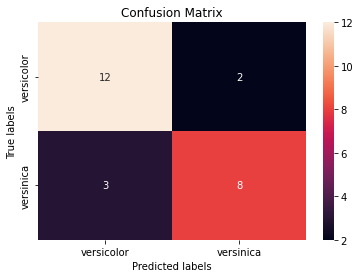

In [67]:
# 描画領域確保
ax= plt.subplot()

# 混同行列計算部分
cm = metrics.confusion_matrix(y_test,y_pred_model_1)
# 描画部分
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# ラベルやタイトルなど
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

[Text(0, 0.5, 'versicolor'), Text(0, 1.5, 'versinica')]

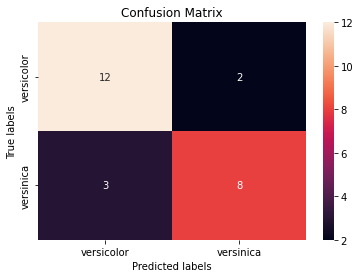

In [71]:
# 描画領域確保
ax= plt.subplot()

# 混同行列計算部分
cm = metrics.confusion_matrix(y_test,y_pred_model_3)
# 描画部分
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# ラベルやタイトルなど
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

[Text(0, 0.5, 'versicolor'), Text(0, 1.5, 'versinica')]

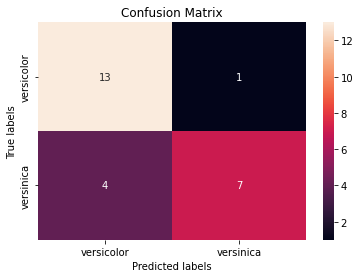

In [72]:
# 描画領域確保
ax= plt.subplot()

# 混同行列計算部分
cm = metrics.confusion_matrix(y_test,y_pred_model_5)
# 描画部分
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# ラベルやタイトルなど
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['versicolor', 'versinica'])
ax.yaxis.set_ticklabels(['versicolor','versinica'])

【問題7】可視化

In [73]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

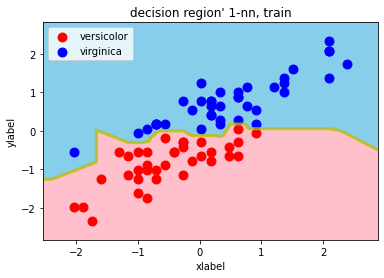

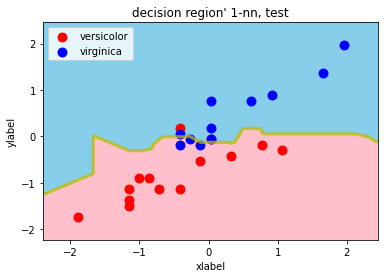

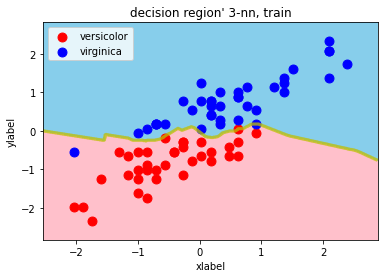

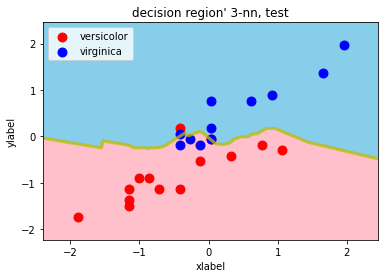

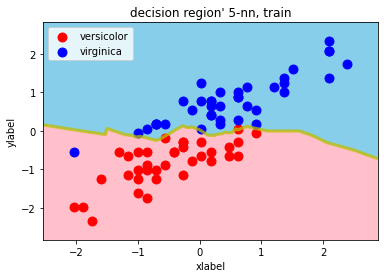

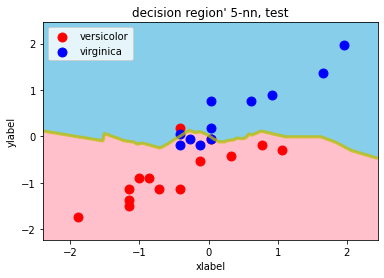

In [74]:
#　問５で作成したモデルを変数に格納
models = [model_1, model_3, model_5]
# プロットのタイトルを変数に格納
model_names = ["1-nn", "3-nn", "5-nn"]

# 可視化
for model, model_name in zip(models, model_names):
    decision_region(X_train_transformed, y_train, model, title="decision region' {}, {}".format(model_name, "train"))
    decision_region(X_test_transformed, y_test, model, title="decision region' {}, {}".format(model_name, "test"))